# Load libraries

In [1]:
!pip install ydata_profiling

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
%matplotlib inline

# Load Dataset

In [4]:
# Load cab data
cab = pd.read_csv("Cab_Data.csv", header=0)
cab.shape

(359392, 7)

In [81]:
cab['Date'] = pd.to_datetime(cab['Date of Travel'], origin='1899-12-30', unit='D')
cab['Year'] = cab['Date'].dt.year
cab['Month'] = cab['Date'].dt.month
cab['Day'] = cab['Date'].dt.day
cab['Transaction ID'] = cab['Transaction ID'].astype(str)

In [70]:
cab.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip       Date  Year  Month  Day  
0         370.95       313.635 2016-01-08  2016      1    8  
1         358.52       334.854 2016-01-06  2016      1    6  
2         125.20        97.632 2016-01-02  2016      1    2  
3         377.40       351.602 2016-01-07  2016      1    7  
4         114.62        97.776 2016-01-03  2016      1    3

In [58]:
# Load city data
city = pd.read_csv("City.csv", header=0)
city.shape

(20, 3)

In [61]:
city['Population'] = city['Population'].replace(',', '', regex=True).astype(int)
city['Users'] = city['Users'].replace(',', '', regex=True).astype(int)

In [63]:
city.head()

City  Population   Users
0     NEW YORK NY     8405837  302149
1      CHICAGO IL     1955130  164468
2  LOS ANGELES CA     1595037  144132
3        MIAMI FL     1339155   17675
4  SILICON VALLEY     1177609   27247

In [8]:
# Load customer data
customer = pd.read_csv("Customer_ID.csv", header=0)
customer.shape

(49171, 4)

In [9]:
customer.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [10]:
# Load transaction data
transaction = pd.read_csv("Transaction_ID.csv", header=0)
transaction.shape

(440098, 3)

In [42]:
transaction['Transaction ID'] = transaction['Transaction ID'].astype('str')
transaction['Customer ID'] = transaction['Customer ID'].astype('str')

In [43]:
transaction.head()

Transaction ID Customer ID Payment_Mode
0       10000011       29290         Card
1       10000012       27703         Card
2       10000013       28712         Cash
3       10000014       28020         Cash
4       10000015       27182         Card

- `Cab_Data.csv` contains 359392 data and 7 columns.
- `City.csv` contains 20 cities along with population and users amount information.
- `Customer_ID.csv` contains 49171 users' info, including gender, age, and income.
- `Transaction_ID.csv` contains 440098 transaction records including customer ID and payment mode.

# Data Checkup

## Missing data checkup

In [12]:
cab.info()
cab.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000

In [13]:
city.info()
city.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY   8,405,837    302,149 
freq              1            1          1

In [14]:
customer.info()
customer.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000

In [15]:
transaction.info()
transaction.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000

No missing value found in 4 datasets.

## Duplicate data checkup

In [16]:
cab.duplicated().sum()

0

In [17]:
city.duplicated().sum()

0

In [18]:
customer.duplicated().sum()

0

In [19]:
transaction.duplicated().sum()

0

No duplicates were found in 4 datasets.

## Data distribution and outlier detection

In [71]:
profile = ProfileReport(cab, 
                        title="Cab Profiling Report", 
                        explorative=True,
                        minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 11/11 [00:00<00:00, 114.97it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Potential seasonal patterns in date of travel
- 2 companies included in the data: yellow and pink
- 19 cities included in the dataset
- Uniform distribution of distance traveled (km) from 0 to 40 km and decrease from 40 t0 48 km.
- Price Charged is right skewed.
- Cost of trip is uniformly distributed from 0 to 400 and decrease from 400 to 700.

In [66]:
profile = ProfileReport(city,
                        title="City Profiling Report", 
                        explorative=True,
                        minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<?, ?it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- Potential relationship between population and users

In [67]:
profile = ProfileReport(customer,
                        title="Customer Profiling Report", 
                        explorative=True,
                        minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:00<00:00, 201.37it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- 54% male customers, 46% female customers
- Uniformly distributed user age from 20 to 40, uniformly distributed user age from 40 to 65 with younger group over twice larger than older age group.
- Uniformly distributed income from 2000 - 23000, uniformly distributed income from 23000 to 35000.

In [68]:
profile = ProfileReport(transaction,
                        title="Transaction Profiling Report", 
                        explorative=True,
                        minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:02<00:00,  1.38it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- 60% pay by cash and 40% by card

# Hypothesis testing

## Seasonality in number of unique customers using the cab services

In [ ]:
# Merge customer and transaction data
cab_customer = cab.merge(transaction, on='Transaction ID', how='left')

# Convert date to Year-Month format
cab_customer['Year-Month'] = cab_customer['Date'].dt.to_period('M')

In [ ]:
# Count unique customers per comapny per month
monthly_customers = (
    cab_customer.groupby(['Company', 'Year-Month'])['Customer ID']
    .nunique()
    .reset_index(name='Unique Customers')
)

In [93]:
monthly_customers.head()

Company Year-Month  Unique Customers
0  Pink Cab    2016-01               910
1  Pink Cab    2016-02              1034
2  Pink Cab    2016-03              1200
3  Pink Cab    2016-04              1210
4  Pink Cab    2016-05              1512

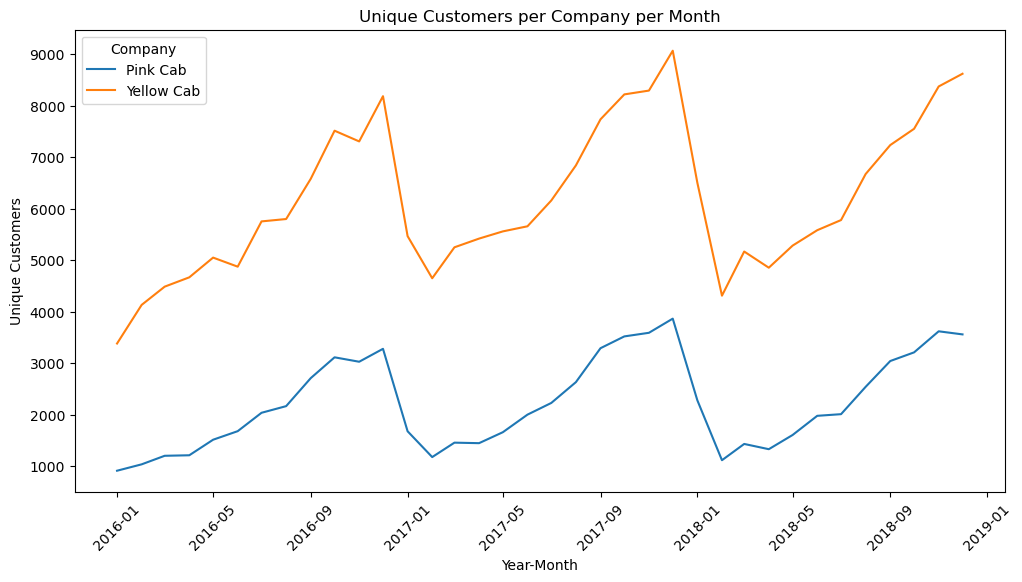

In [100]:
# Convert Year-Month to datetime format for plotting
monthly_customers['YearMonth'] = monthly_customers['Year-Month'].dt.to_timestamp()

# Plot the number of unique customers per company per month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_customers, x='YearMonth', y='Unique Customers', hue='Company')
plt.title('Unique Customers per Company per Month')
plt.xlabel('Year-Month')
plt.ylabel('Unique Customers')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

Both companies exhibit a clear seasonal pattern in the number of unique monthly users. Each year, the number of users steadily increases from January to December, peaking in December, and then drops back to the starting level at the beginning of the following year.

Notably, Yellow Cab consistently has 3,000 to 4,000 more unique users than Pink Cab each month.

## Monthly Margin trend comparison

In [120]:
# Calculate margin for each transaction
cab_customer['Profit'] = cab_customer['Price Charged'] - cab_customer['Cost of Trip']

monthly_margin = (
    cab_customer.groupby(['Company', 'Year-Month']).agg({
        'Price Charged': 'sum',
        'Profit': 'sum'
    })
    .reset_index()
)

monthly_margin['Margin'] = (monthly_margin['Profit'] / monthly_margin['Price Charged']) * 100

In [121]:
monthly_margin.head()

Company Year-Month  Price Charged     Profit     Margin
0  Pink Cab    2016-01      305236.77  73952.863  24.228032
1  Pink Cab    2016-02      344521.86  87475.544  25.390419
2  Pink Cab    2016-03      394890.37  87801.183  22.234319
3  Pink Cab    2016-04      383077.51  82591.853  21.560089
4  Pink Cab    2016-05      447231.76  61550.958  13.762654

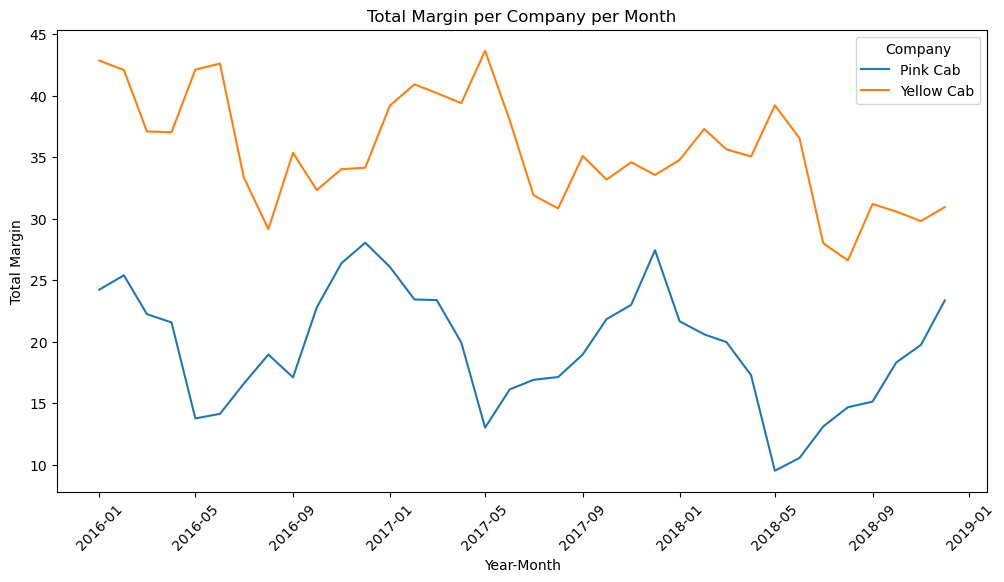

In [122]:
# Convert Year-Month to datetime format for plotting
monthly_margin['YearMonth'] = monthly_margin['Year-Month'].dt.to_timestamp()

# Plot the total margin per company per month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_margin, x='YearMonth', y='Margin', hue='Company')
plt.title('Total Margin per Company per Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Margin')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

- Yellow Cab consistently maintains a profit margin twice as large as that of Pink Cab. Its margin peaks between January and May, followed by a rebound in winter after a mid-year dip. It also exihibits a decreasing trend of margin from 2016 to 2018.
- Pink Cab displays a repeating annual pattern, with its margin peaking from September to May, suggesting stronger performance during the academic or colder months.

## Relationship between number of customers vs. Margin

In [137]:
customer_margin = (
    cab_customer.groupby(['Company', 'Year-Month']).agg({
        'Customer ID': 'count',
        'Profit': 'sum',
        'Price Charged': 'sum'
    })
    .reset_index()
    .rename(columns={'Customer ID': 'Customers'})
)

customer_margin['Margin'] = (customer_margin['Profit'] / customer_margin['Price Charged']) * 100
customer_margin['YearMonth'] = customer_margin['Year-Month'].dt.to_timestamp()

In [139]:
customer_margin.head()

Company Year-Month  Customers     Profit  Price Charged     Margin  \
0  Pink Cab    2016-01        927  73952.863      305236.77  24.228032   
1  Pink Cab    2016-02       1050  87475.544      344521.86  25.390419   
2  Pink Cab    2016-03       1231  87801.183      394890.37  22.234319   
3  Pink Cab    2016-04       1240  82591.853      383077.51  21.560089   
4  Pink Cab    2016-05       1567  61550.958      447231.76  13.762654   

   YearMonth  
0 2016-01-01  
1 2016-02-01  
2 2016-03-01  
3 2016-04-01  
4 2016-05-01

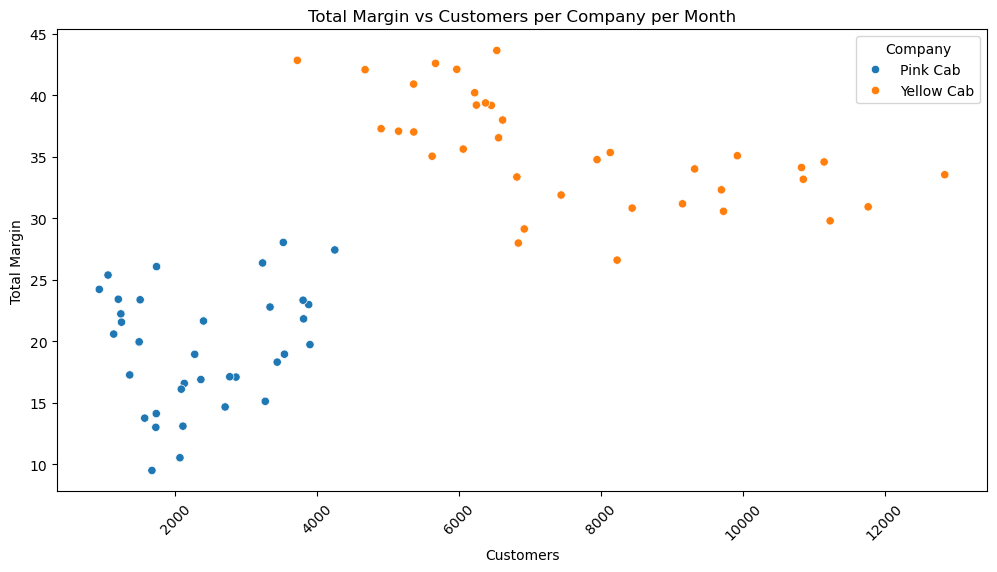

In [140]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=customer_margin, x='Customers', y='Margin', hue='Company')
plt.title('Total Margin vs Customers per Company per Month')
plt.xlabel('Customers')
plt.ylabel('Total Margin')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

In [142]:
# Correlation analysis
for company in cab_customer['Company'].unique():
    company_data = customer_margin[customer_margin['Company'] == company]
    correlation = company_data[['Customers', 'Margin']].corr().iloc[0, 1]
    print(f"Correlation for {company}: {correlation:.2f}")

Correlation for Pink Cab: 0.20
Correlation for Yellow Cab: -0.61


- For Yellow Cab, there's a negative relationship between the number of customers and monthly margin.
- For Pink Cab, there's a slightly positive relationship between the number of customers and monthly margin.

## Correlation between Population vs. Users

In [147]:
city['User_Ratio'] = city['Users'] / city['Population']

threshold = city['User_Ratio'].quantile(0.75)
city_high_users = city[city['User_Ratio'] > threshold]

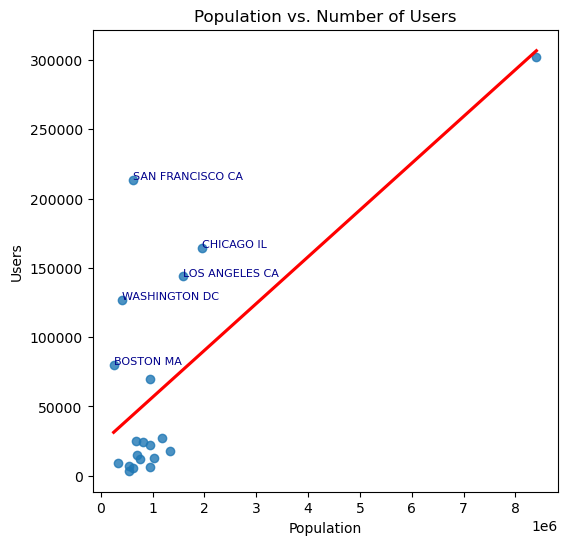

In [150]:
# Scatter plot of Population vs. Users in cab data
plt.figure(figsize=(6, 6))
sns.regplot(data=city, x='Population', y='Users', ci=None, line_kws={'color': 'red'})
plt.title('Population vs. Number of Users')
plt.xlabel('Population')
plt.ylabel('Users')

# Add labels for cities with high user ratio
for i, row in city_high_users.iterrows():
    plt.text(row['Population'], row['Users'], row['City'], fontsize=8, color='darkblue')

plt.show()

In general, larger cities with higher populations tend to have more users. However, several cities stand out for having a particularly high user-to-population ratio. These include San Francisco, Chicago, Los Angeles, Washington D.C., and Boston — indicating a relatively higher adoption rate of the cab services in these areas compared to their population size.

## Attributes of Customer Segments